In [84]:
document1 = ['The session started yesterday in inceptez',
           'It was a NLP Session in Inceptez',
           'In the Session, the mentees are very very curious to learn',
           'The weather is hot',
           'It will rain tommorow after the hot week ',
           'Inceptez started the session yesterday',
           'The climate is very humid',
           'tommorow will rain after a week hot']

document2 = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
            ]

In [85]:
import nltk
import re

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)


norm_corpus1 = normalize_corpus(document1)
norm_corpus2 = normalize_corpus(document2)


In [86]:
tokenized_corpus1 = [nltk.word_tokenize(doc) for doc in norm_corpus1]
tokenized_corpus2 = [nltk.word_tokenize(doc) for doc in norm_corpus2]

In [87]:
tokenized_corpus2

[['sky', 'blue', 'beautiful'],
 ['love', 'blue', 'beautiful', 'sky'],
 ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog'],
 ['kings', 'breakfast', 'sausages', 'ham', 'bacon', 'eggs', 'toast', 'beans'],
 ['love', 'green', 'eggs', 'ham', 'sausages', 'bacon'],
 ['brown', 'fox', 'quick', 'blue', 'dog', 'lazy'],
 ['sky', 'blue', 'sky', 'beautiful', 'today'],
 ['dog', 'lazy', 'brown', 'fox', 'quick']]

In [88]:
import pandas as pd
import numpy as np
import gensim

In [49]:
# Load GloVe embeddings into a dictionary
def load_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_embeddings_path = 'Scriptures/glove.6B.300d.txt'  # Adjust the path to your downloaded GloVe file
wv = load_embeddings(glove_embeddings_path)

4 words

eachword = (100,) 

document[0] = 4*(100,) -> (100,)

10 class

each class - 20
cla


fruit bowl - raj -> apple, bannana, grape 
fruit bowl - hari -> gauva, bannana, pineapple
apple =   [vit-A, vit-B, vit-C] , [3,5,2]
bannana = [vit-A, vit-B, vit-C] , [4,2,4]
grape =   [vit-A, vit-B, vit-C] , [1,1,8]
gauva =   [vit-A, vit-B, vit-C] , [2,2,6]
pineapple =[vit-A, vit-B, vit-C] , [0,9,1]

fruit bowl - raj -> apple, bannana, grape      [2.6,2.6,4.6]

fruit bowl - hari -> gauva, bannana, pineapple [2, 4.2, 4.2]


w1[2,4,2]
w2[2,3,5]
w3[2,6,4]
w4[6,8,7]

o/p->[x1,x2,x3]

x1 = (2+2+2+2+6)/4
x2 = (4+3+6+8)/4
x3 = (2+5+4+7)/4

sumof n number

In [14]:
sum = 0
for i in range(1,10):
    sum = sum + i

In [15]:
sum

45

In [18]:
np.zeros((100,),dtype="float64")

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [89]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.keys())
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)
# get document level embeddings
feature_size = 300
ft_doc_features1 = averaged_word_vectorizer(corpus=tokenized_corpus1, model=wv,
                                             num_features=feature_size)
pd.DataFrame(ft_doc_features1)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.105490,-0.094922,-0.061031,0.317963,0.057467,-0.353833,-0.115723,-0.088489,0.064666,-1.108650,...,0.100572,-0.113868,-0.469937,0.083024,-0.004990,0.514567,-0.187670,-0.543213,0.100947,0.007114
1,-0.021775,0.208312,0.065305,0.630710,0.186426,-0.195715,-0.202112,-0.210175,0.116475,-0.072225,...,-0.254586,-0.506785,-0.088270,-0.149465,-0.244155,0.361095,-0.323140,-0.273243,0.210395,0.250216
2,-0.058105,0.036959,-0.063160,-0.195325,0.253108,-0.138767,0.079330,-0.346145,-0.175521,-0.313065,...,0.214947,-0.199429,-0.228716,-0.184692,0.104248,-0.218067,-0.237677,0.003162,0.107573,-0.023847
3,0.164717,-0.373017,-0.062920,-0.071675,-0.320965,0.063653,0.140110,0.614850,-0.072731,-1.378225,...,-0.366800,0.271875,-0.403625,0.314385,0.089540,0.082380,-0.301395,0.047065,-0.208598,0.487245
4,-0.109103,-0.164293,-0.250830,0.130323,-0.195473,-0.271213,0.126997,0.268932,0.046486,-0.555393,...,-0.103777,-0.026632,0.095340,0.487085,0.037970,-0.026978,-0.066815,-0.140599,-0.004190,0.131949
5,-0.105490,-0.094922,-0.061031,0.317963,0.057467,-0.353833,-0.115723,-0.088489,0.064666,-1.108650,...,0.100572,-0.113868,-0.469937,0.083024,-0.004990,0.514567,-0.187670,-0.543213,0.100947,0.007114
6,-0.015590,-0.025500,-0.391860,-0.293735,-0.262407,0.074021,-0.084465,0.739880,0.258970,-1.444705,...,0.102093,0.464004,-0.757880,0.841150,0.100553,0.358100,-0.365353,0.548410,-0.401480,0.533585
7,-0.109103,-0.164293,-0.250830,0.130323,-0.195473,-0.271213,0.126997,0.268932,0.046486,-0.555393,...,-0.103777,-0.026632,0.095340,0.487085,0.037970,-0.026978,-0.066815,-0.140599,-0.004190,0.131949


In [90]:
#Sentence Similarity

<Axes: >

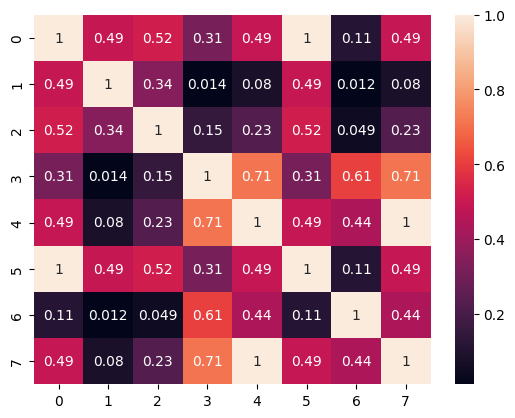

In [91]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
sns.heatmap(pd.DataFrame(cosine_similarity(pd.DataFrame(ft_doc_features1))), annot=True)

In [92]:
ft_doc_features2 = averaged_word_vectorizer(corpus=tokenized_corpus2, model=wv,
                                             num_features=feature_size)
pd.DataFrame(ft_doc_features2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.083748,-0.183797,0.234270,-0.134320,-0.310173,0.097210,-0.293476,0.216880,-0.114627,-0.888617,...,0.309600,0.205093,-0.684153,0.350607,-0.147480,-0.037095,0.507757,0.013333,0.313003,0.073003
1,-0.175823,-0.220653,0.159801,-0.093659,-0.286060,0.115005,-0.224404,0.174487,-0.099059,-0.913227,...,0.106283,0.146496,-0.518428,0.202323,-0.026785,-0.116657,0.444212,0.019726,0.295537,0.047578
2,0.114813,0.127308,0.151340,0.009923,-0.104592,0.010899,-0.100661,0.217513,-0.077806,-0.526227,...,0.134080,0.104089,-0.233820,0.065771,-0.099088,-0.071398,0.050062,-0.028876,-0.180567,0.218268
3,0.191983,0.305715,0.230081,0.276243,-0.105731,-0.159502,0.023570,0.125448,0.058445,-0.063969,...,-0.280523,-0.023437,0.021539,-0.127191,-0.167626,-0.579531,-0.037892,-0.364563,-0.286097,0.153725
4,0.156233,0.201758,0.259937,0.153779,-0.054519,-0.367307,0.067933,0.154246,-0.033535,-0.447217,...,-0.379955,0.013636,0.323879,-0.179039,-0.123778,-0.440432,0.161982,-0.195059,-0.081538,-0.054948
5,0.145102,0.145681,0.144086,0.003060,-0.100125,-0.071494,-0.154967,0.261330,-0.047908,-0.581657,...,0.147568,0.051624,-0.299098,0.180363,-0.164300,-0.033320,0.215288,-0.087546,-0.053997,0.233085
6,-0.057281,-0.188556,0.293758,0.006198,-0.267034,0.123989,-0.343532,0.252448,-0.103447,-1.083990,...,0.334972,0.212129,-0.579878,0.276298,-0.165388,-0.009375,0.363954,-0.074571,0.171506,0.014875
7,0.171404,0.174665,0.123688,0.054124,-0.067388,-0.049323,-0.128871,0.281314,-0.056315,-0.520506,...,0.135172,0.041969,-0.206060,0.119972,-0.113953,-0.061760,0.084332,-0.054576,-0.265756,0.267184


<Axes: >

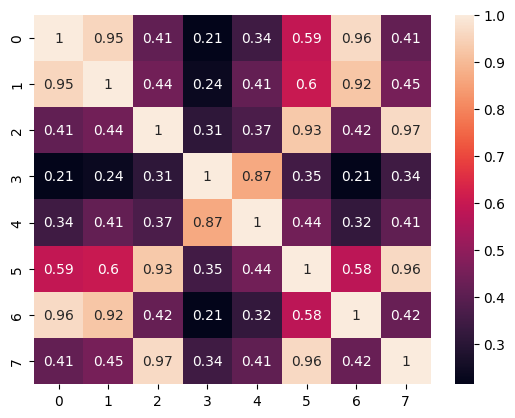

In [93]:
sns.heatmap(pd.DataFrame(cosine_similarity(pd.DataFrame(ft_doc_features2))), annot=True)

In [58]:
# Document Similarity

In [94]:
doc1 = pd.DataFrame(ft_doc_features1).apply(lambda x: x.mean(), axis = 0)
doc2 = pd.DataFrame(ft_doc_features2).apply(lambda x: x.mean(), axis = 0)

In [95]:
documents = pd.concat([doc1,doc2], axis = 1).T

<Axes: >

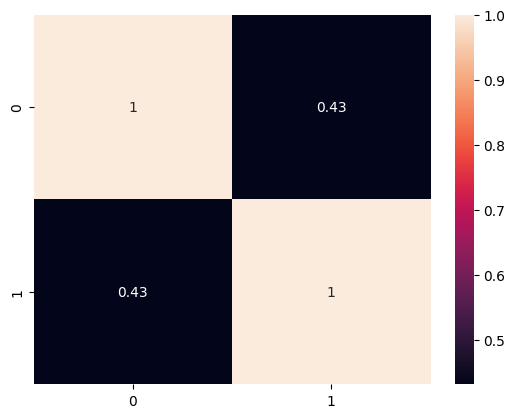

In [96]:
sns.heatmap(pd.DataFrame(cosine_similarity(pd.DataFrame(documents))), annot=True)

word2vec - 100
sentence2vec -100
doc2vec -100